In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import platform
sns.set(rc={'figure.figsize':(20, 10)})

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

In [142]:
import os

In [143]:
for path in os.listdir():
    name, ext = os.path.splitext(path)
    if ext == '.csv':
        data = pd.read_csv(path, encoding='cp949')
        print(path)
        # print(data)

유치원수.csv
유치원_교원수.csv
지역별_면적.csv
인구수.csv
유치원_원아수_.csv
출생아수.csv
유치원_원아수.csv


In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,10))

In [145]:
path = '유치원_원아수.csv'
df = pd.read_csv(path, encoding='cp949')
df['증감률'] = scaler.fit_transform(df[['증감률']])
df

,시점,행정구역별,원데이터,전년 대비 증감,증감률
0,2017,전국,694631,-9507,2.807018
1,2017,서울특별시,88987,-2039,2.526316
2,2017,부산광역시,45853,-775,2.701754
3,2017,대구광역시,38936,71,3.368421
4,2017,인천광역시,44009,-616,2.807018
...,...,...,...,...,...
103,2022,전라북도,18740,-1282,1.052632
104,2022,전라남도,16285,-991,1.298246
105,2022,경상북도,31365,-2010,1.192982
106,2022,경상남도,42385,-2759,1.157895


In [146]:
cond_1 = df['시점'] == 2022
cond_2 = df['행정구역별'] != '전국'
k1 = df[cond_1 & cond_2][['행정구역별', '증감률','원데이터']]

k1.columns = ['행정구역별', '원아증감률','원아수']

In [147]:
path = '유치원수.csv'
df = pd.read_csv(path, encoding='cp949')
df['증감률'] = scaler.fit_transform(df[['증감률']])
df

,시점,행정구역별,원데이터,전년 대비 증감,증감률
0,2017,전국,9029,42,2.510823
1,2017,서울특별시,880,1,2.337662
2,2017,부산광역시,417,5,2.813853
3,2017,대구광역시,370,-5,1.731602
4,2017,인천광역시,430,3,2.597403
...,...,...,...,...,...
103,2022,전라북도,501,-6,1.774892
104,2022,전라남도,516,-8,1.645022
105,2022,경상북도,682,-13,1.471861
106,2022,경상남도,683,0,2.294372


In [148]:
cond_1 = df['시점'] == 2022
cond_2 = df['행정구역별'] != '전국'
k2 = df[cond_1 & cond_2][['행정구역별', '증감률']]
k2.columns = ['행정구역별', '유치원증감률']

In [149]:
path = '인구수.csv'
df = pd.read_csv(path, encoding='cp949', header=1)
# df['증감률'] = scaler.fit_transform(df[['증감률']])
df

,행정구역(시군구)별,시점,원데이터,전년 대비 증감,증감률
0,전국,2022,51439038,-199771,-0.4
1,서울특별시,2022,9428372,-81086,-0.9
2,부산광역시,2022,3317812,-32568,-1.0
3,대구광역시,2022,2363691,-21721,-0.9
4,인천광역시,2022,2967314,18939,0.6
5,광주광역시,2022,1431050,-10561,-0.7
6,대전광역시,2022,1446072,-6179,-0.4
7,울산광역시,2022,1110663,-10929,-1.0
8,세종특별자치시,2022,383591,11696,3.1
9,경기도,2022,13589432,23982,0.2


In [150]:
cond_1 = df['시점'] == 2022
cond_2 = df['행정구역(시군구)별'] != '전국'
k3 = df[cond_1 & cond_2][['행정구역(시군구)별', '증감률','원데이터']]
k3.columns = ['행정구역별','인구증감률','인구수']

In [170]:
k = pd.merge(k1, k2)
res_df = pd.merge(k, k3)
# k = pd.merge(k, k)
res_df

,행정구역별,원아증감률,원아수,유치원증감률,인구증감률,인구수
0,서울특별시,1.578947,66524,2.337662,-0.9,9428372
1,부산광역시,1.157895,36308,1.948052,-1.0,3317812
2,대구광역시,1.543860,32272,0.649351,-0.9,2363691
3,인천광역시,2.561404,35427,1.948052,0.6,2967314
4,광주광역시,1.403509,20998,1.428571,-0.7,1431050
5,대전광역시,1.859649,20405,2.640693,-0.4,1446072
6,울산광역시,0.877193,14779,1.168831,-1.0,1110663
7,세종특별자치시,2.350877,6422,3.679654,3.1,383591
8,경기도,1.368421,153149,1.645022,0.2,13589432
9,강원도,1.964912,13168,1.818182,-0.1,1536498


In [157]:
res_df[['행정구역별','원아수_인구수']].to_csv('hi.csv', index=False)

In [175]:
res_df['원아증감률'].apply(lambda x:round(x,2))

0     1.58
1     1.16
2     1.54
3     2.56
4     1.40
5     1.86
6     0.88
7     2.35
8     1.37
9     1.96
10    2.00
11    2.00
12    1.05
13    1.30
14    1.19
15    1.16
16    1.44
Name: 원아증감률, dtype: float64

In [173]:
res_df[['행정구역별','원아증감률','원아수_인구수']]

,행정구역별,원아증감률,원아수_인구수
0,서울특별시,1.578947,0.007056
1,부산광역시,1.157895,0.010943
2,대구광역시,1.543860,0.013653
3,인천광역시,2.561404,0.011939
4,광주광역시,1.403509,0.014673
5,대전광역시,1.859649,0.014111
6,울산광역시,0.877193,0.013306
7,세종특별자치시,2.350877,0.016742
8,경기도,1.368421,0.011270
9,강원도,1.964912,0.008570


TypeError: only size-1 arrays can be converted to Python scalars

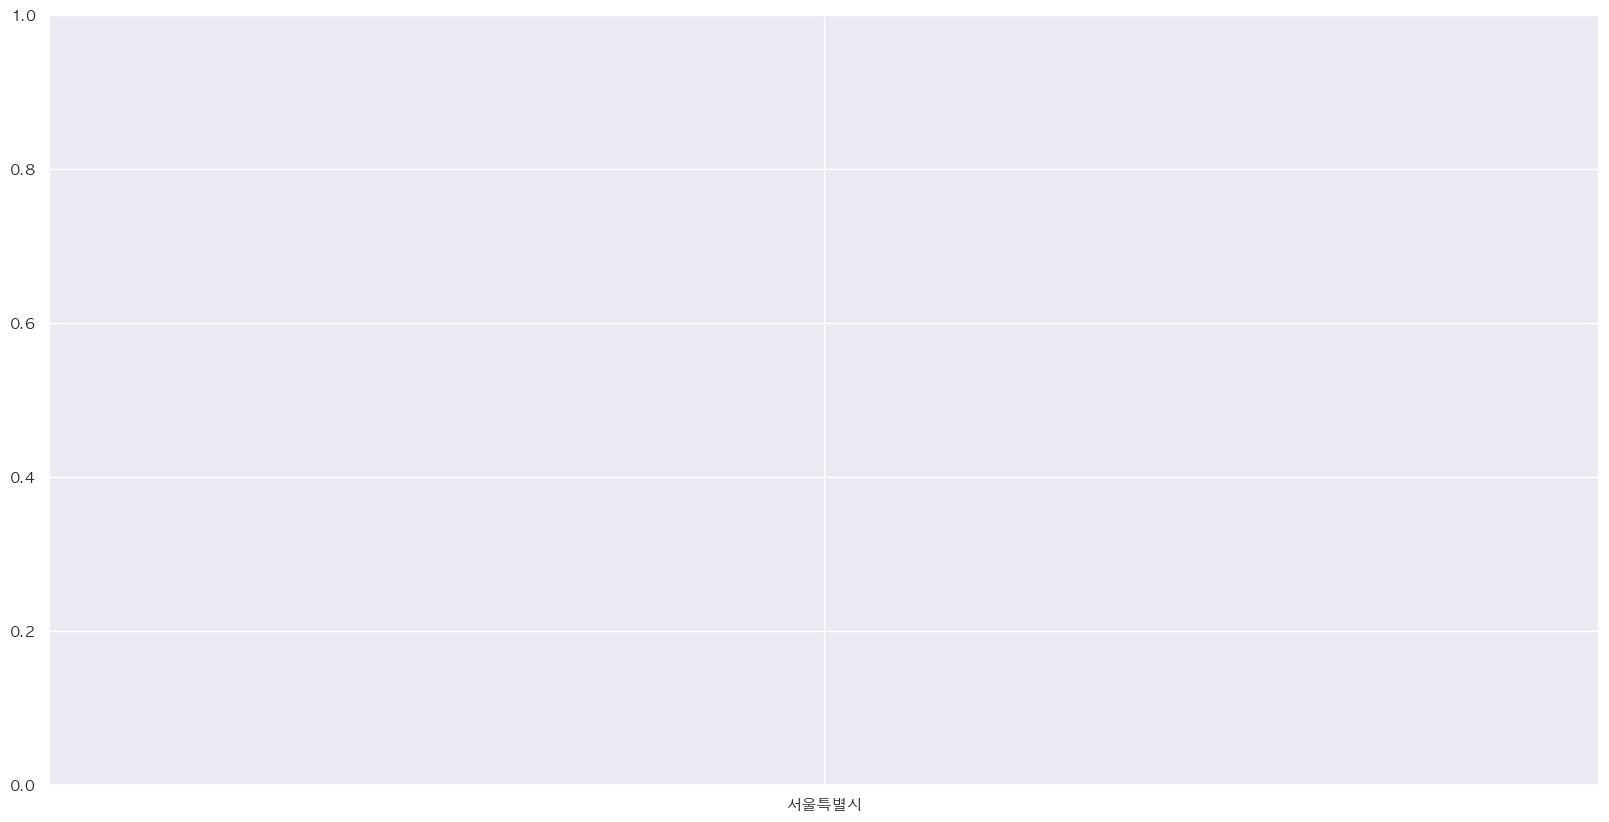

In [182]:
fig, ax1 = plt.subplots()
# 첫 번째 y축
ax1.bar(res_df['행정구역별'], res_df['원아증감률'], 'g-')
ax1.set_xlabel('X')
ax1.set_ylabel('Y1', color='g')
ax1.tick_params('y', colors='g')

# 두 번째 y축
ax2 = ax1.twinx()
ax2.bar(res_df['행정구역별'], res_df['원아수_인구수'], 'b-')
ax2.set_ylabel('Y2', color='b')
ax2.tick_params('y', colors='b')

plt.show()

In [172]:
res_df['원아수_인구수'] = res_df['원아수']/res_df['인구수']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


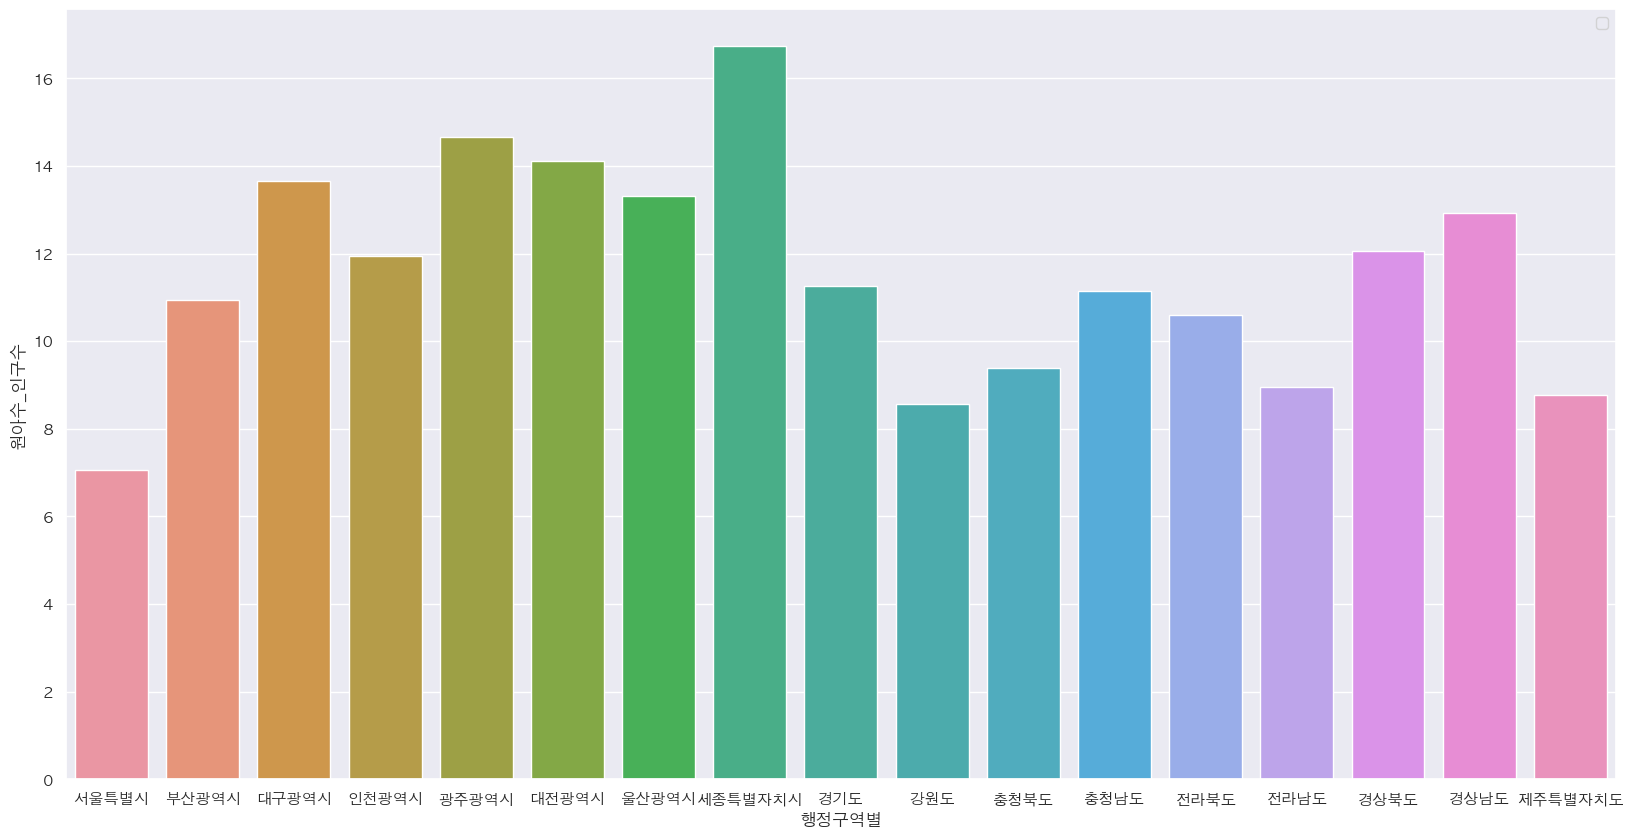

In [154]:

sns.barplot(data=res_df, x='행정구역별', y='원아수_인구수')
# plt.x
plt.legend()
plt.show();

In [123]:
res_df['원아수/인구수'].max()

0.01674179008370895

In [88]:
pd.merge(k1, k2)

,행정구역별,원아증감률,유치원증감률
0,서울특별시,1.578947,2.337662
1,부산광역시,1.157895,1.948052
2,대구광역시,1.543860,0.649351
3,인천광역시,2.561404,1.948052
4,광주광역시,1.403509,1.428571
5,대전광역시,1.859649,2.640693
6,울산광역시,0.877193,1.168831
7,세종특별자치시,2.350877,3.679654
8,경기도,1.368421,1.645022
9,강원도,1.964912,1.818182


In [43]:
import platform
sns.set(rc={'figure.figsize':(20, 10)})

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

In [71]:
df

,시점,행정구역별,원데이터,전년 대비 증감,증감률,증감률_수치
0,2017,전국,9029,42,0.5,0.251082
1,2017,서울특별시,880,1,0.1,0.233766
2,2017,부산광역시,417,5,1.2,0.281385
3,2017,대구광역시,370,-5,-1.3,0.173160
4,2017,인천광역시,430,3,0.7,0.259740
...,...,...,...,...,...,...
103,2022,전라북도,501,-6,-1.2,0.177489
104,2022,전라남도,516,-8,-1.5,0.164502
105,2022,경상북도,682,-13,-1.9,0.147186
106,2022,경상남도,683,0,0.0,0.229437


In [54]:
scaler.fit_transform(df['증감률'])

AttributeError: 'Series' object has no attribute 'reshape'

In [51]:
s

0    -4.9
1    -6.1
2    -5.0
3    -2.1
4    -5.4
5    -4.1
6    -6.9
7    -2.7
8    -5.5
9    -3.8
10   -3.7
11   -3.7
12   -6.4
13   -5.7
14   -6.0
15   -6.1
16   -5.3
Name: 증감률, dtype: float64

In [47]:
total = df['증감률'].sum()
df['조정된_증감률'] = df['증감률'] / total * 100

# 결과 출력
print(df)

      행정구역별  증감률   조정된_증감률
0     서울특별시 -4.9  5.875300
1     부산광역시 -6.1  7.314149
2     대구광역시 -5.0  5.995204
3     인천광역시 -2.1  2.517986
4     광주광역시 -5.4  6.474820
5     대전광역시 -4.1  4.916067
6     울산광역시 -6.9  8.273381
7   세종특별자치시 -2.7  3.237410
8       경기도 -5.5  6.594724
9       강원도 -3.8  4.556355
10     충청북도 -3.7  4.436451
11     충청남도 -3.7  4.436451
12     전라북도 -6.4  7.673861
13     전라남도 -5.7  6.834532
14     경상북도 -6.0  7.194245
15     경상남도 -6.1  7.314149
16  제주특별자치도 -5.3  6.354916


<AxesSubplot: ylabel='조정된_증감률'>

/Users/ktg/miniforge3/envs/school/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  func(*args, **kwargs)
/Users/ktg/miniforge3/envs/school/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
/Users/ktg/miniforge3/envs/school/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  func(*args, **kwargs)
/Users/ktg/miniforge3/envs/school/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  func(*args, **kwargs)
/Users/ktg/miniforge3/envs/school/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  func(*args, **kwargs)
/Users/ktg/miniforge3/envs/school/lib/pyt

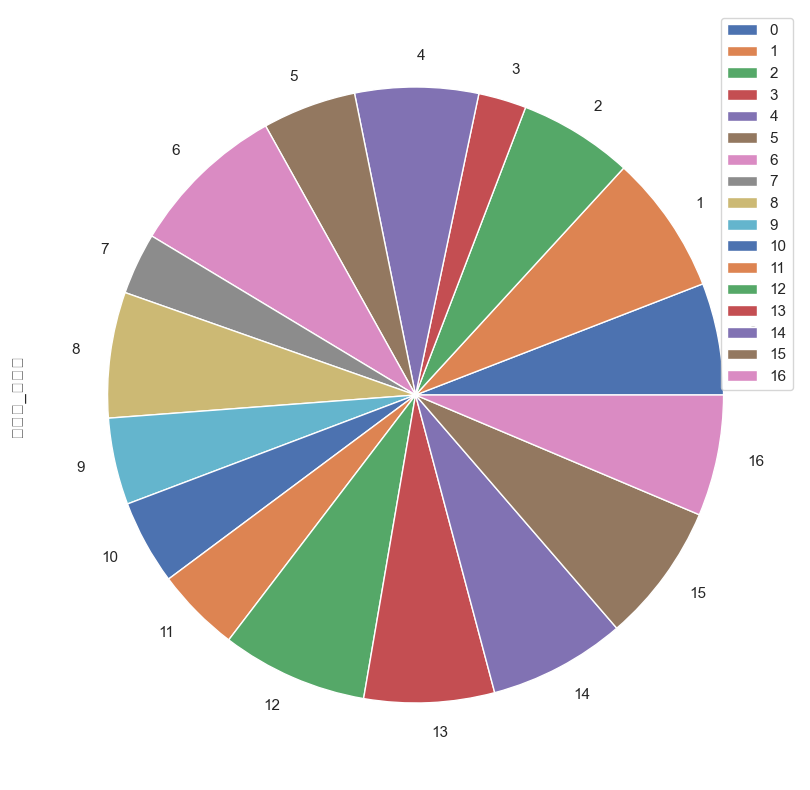

In [50]:
df.plot.pie(y='조정된_증감률')

In [36]:
df_2022['증감률'].to_numpy().reshape(1, -1)

array([[-4.9, -6.1, -5. , -2.1, -5.4, -4.1, -6.9, -2.7, -5.5, -3.8, -3.7,
        -3.7, -6.4, -5.7, -6. , -6.1, -5.3]])

/Users/ktg/miniforge3/envs/school/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ktg/miniforge3/envs/school/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ktg/miniforge3/envs/school/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ktg/miniforge3/envs/school/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ktg/miniforge3/envs/school/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}

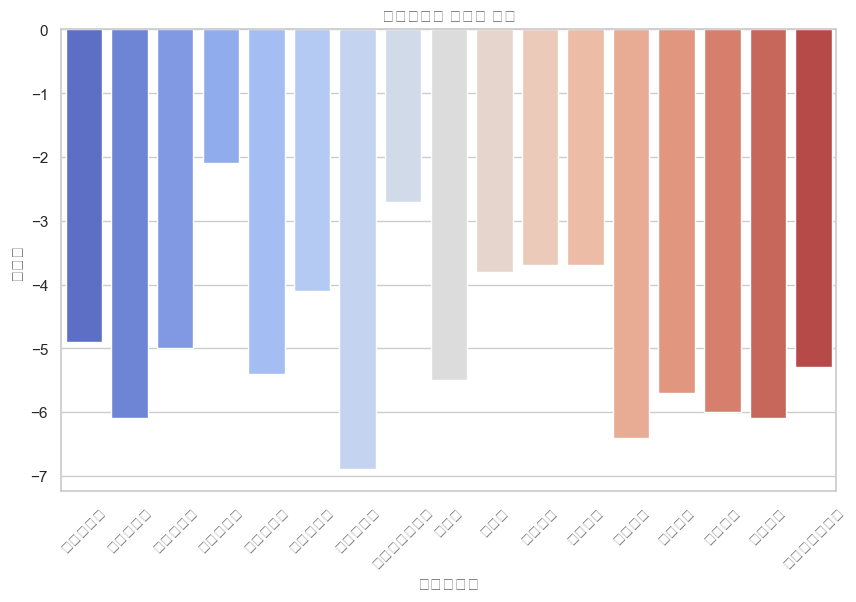

In [46]:
# 데이터 프레임 생성
data = {
    '행정구역별': ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
    '증감률': [-4.9, -6.1, -5.0, -2.1, -5.4, -4.1, -6.9, -2.7, -5.5, -3.8, -3.7, -3.7, -6.4, -5.7, -6.0, -6.1, -5.3]
}

df = pd.DataFrame(data)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# 증감률 비율을 원 그래프로 표현
sns.(x='행정구역별', y='증감률', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('행정구역별')
plt.ylabel('증감률')
plt.title('행정구역별 증감률 비율')

plt.show();